In [6]:
import pandas as pd
import numpy as np


In [7]:
df = pd.read_csv('DataAnalyst.csv',encoding = 'gb2312')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876 entries, 0 to 6875
Data columns (total 17 columns):
city                 6876 non-null object
companyFullName      6876 non-null object
companyId            6876 non-null int64
companyLabelList     6170 non-null object
companyShortName     6876 non-null object
companySize          6876 non-null object
businessZones        4873 non-null object
firstType            6869 non-null object
secondType           6870 non-null object
education            6876 non-null object
industryField        6876 non-null object
positionId           6876 non-null int64
positionAdvantage    6876 non-null object
positionName         6876 non-null object
positionLables       6844 non-null object
salary               6876 non-null object
workYear             6876 non-null object
dtypes: int64(2), object(15)
memory usage: 913.3+ KB


In [9]:
len(df.positionId.unique())

5031

In [10]:
df_duplicates = df.drop_duplicates(subset='positionId',keep='first')
df_duplicates.head(5)

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生
2,上海,上海晶樵网络信息技术有限公司,57561,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥'],设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生
3,上海,杭州数云信息技术有限公司上海分公司,7502,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']",市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生
4,上海,上海银基富力信息技术有限公司,130876,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']",技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生


In [11]:
#工资分成两列
def cut_word(word):
        position = word.find('-')
        if position != -1:
            bottomSalary = word[:position-1]
        else:
             bottomSalary = word[:word.upper().find('K')]
        return bottomSalary
    

In [12]:
df_duplicates['bottomSalary']=df_duplicates.salary.apply(cut_word)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
df_duplicates.bottomSalary.astype('int')

0        7
1       10
2        4
3        6
4        2
5       10
6        7
7        5
8        4
9        2
10       5
11       2
12       2
13       4
14       4
15      10
16      10
17       6
18       2
19       3
20      10
21       3
22       6
23       4
24       4
25       2
26       4
27      10
28      10
29       6
        ..
5019    20
5020    15
5021     8
5022     6
5023     5
5024     2
5025     4
5026     6
5027     6
5028     5
5029     4
5030     3
5031    10
5032     8
5033     8
5034    10
5035     6
5036    15
5037     3
5038     4
5039     6
5040    12
5041     3
5042     3
5043     8
6054    15
6330    15
6465    30
6605     4
6766    15
Name: bottomSalary, Length: 5031, dtype: int32

In [14]:
def cut_word(word,method):
    position = word.find('-')
    length = len(word)
    if position !=-1:
        bottomSalary = word[:position-1]
        topSalary = word[position+1:length-1]
    else:
        bottomSalary =  word[:word.upper().find('K')]
        topSalary = bottomSalary
    if method =='bottom':
        return bottomSalary 
    else :
        return topSalary 

In [15]:
df_duplicates['topSalary']= df_duplicates.salary.apply(cut_word,method='top')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_duplicates.topSalary = df_duplicates.topSalary.astype('int')
df_duplicates.bottomSalary = df_duplicates.bottomSalary.astype('int')
df_duplicates['avgSalary'] = df_duplicates.apply(lambda x:(x.bottomSalary+x.topSalary)/2,axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
df_clean = df_duplicates[['city','companyShortName','companySize',
                          'education','positionName','positionLables',
                          'workYear','avgSalary']]
df_clean.head()

,city,companyShortName,companySize,education,positionName,positionLables,workYear,avgSalary
0,上海,1号店,2000人以上,硕士,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,8.0
1,上海,点融网,500-2000人,本科,数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,12.5
2,上海,SPD,50-150人,本科,数据分析师,"['分析师', '数据分析', '数据']",应届毕业生,5.0
3,上海,数云,150-500人,本科,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",应届毕业生,7.0
4,上海,银基富力,15-50人,本科,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",应届毕业生,2.5


In [18]:
df_clean.city.value_counts()
#统计所有非零元素的个数

北京    2347
上海     979
深圳     527
杭州     406
广州     335
成都     135
南京      83
武汉      69
西安      38
苏州      37
厦门      30
长沙      25
天津      20
Name: city, dtype: int64

In [19]:
df_clean.describe()
#分类数据用value_counts,数值数据用describe

,avgSalary
count,5031.000000
mean,17.111409
std,8.996242
min,1.500000
25%,11.500000
50%,15.000000
75%,22.500000
max,75.000000


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 
#允许图表在cell中输出
plt.style.use('ggplot')
#配色风格

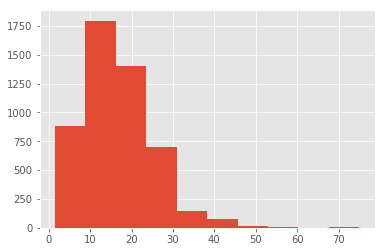

In [21]:
df_clean.avgSalary.hist()

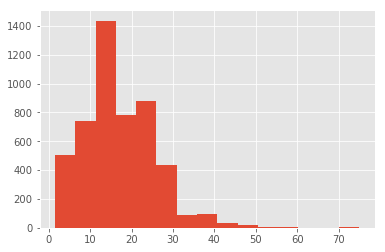

In [22]:
df_clean.avgSalary.hist(bins=15)
#增加组数，缩小宽距

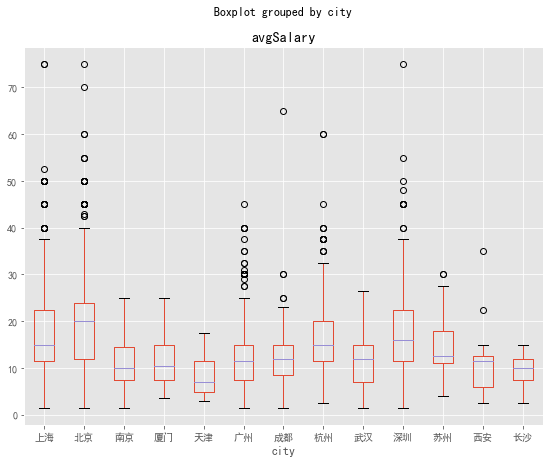

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
df_clean.boxplot(column = 'avgSalary',by='city',figsize=(9,7))

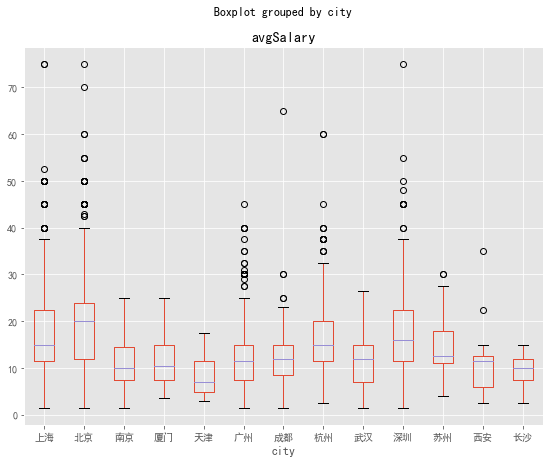

In [24]:
import matplotlib.pyplot as plt
df_clean.boxplot(column = 'avgSalary',by='city',figsize=(9,7))

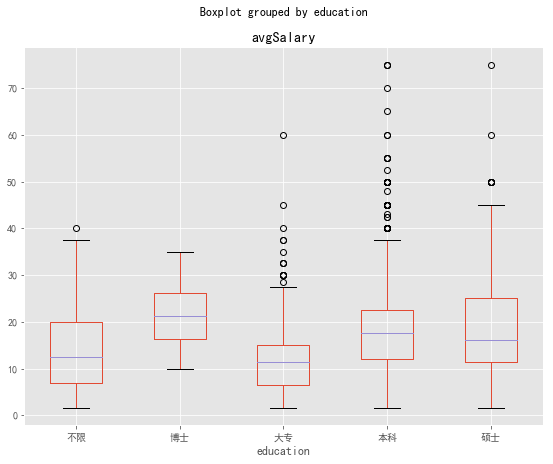

In [25]:
df_clean.boxplot(column = 'avgSalary',by='education',figsize=(9,7))

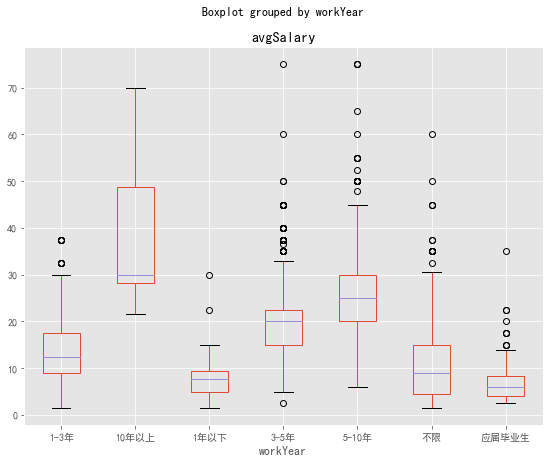

In [26]:
df_clean.boxplot(column = 'avgSalary',by='workYear',figsize=(9,7))

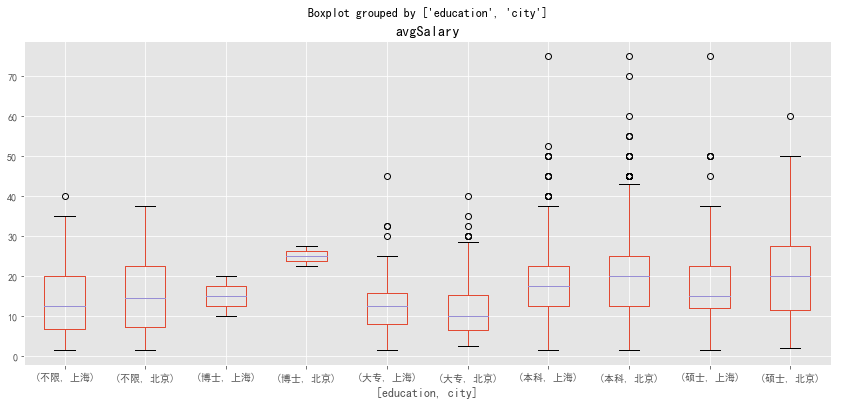

In [27]:
df_sh_bj = df_clean[df_clean['city'].isin(['上海','北京'])]
df_sh_bj.boxplot(column = 'avgSalary',by=['education','city'],figsize=(14,6))

In [28]:
df_clean.groupby(['city','education']).mean().unstack()
#unstack() 进行行列转置

avgSalary                                       
education         不限    博士         大专         本科         硕士
city                                                       
上海         14.051471  15.0  13.395455  17.987552  19.180000
北京         15.673387  25.0  12.339474  19.435802  19.759740
南京          7.000000   NaN   9.272727  11.327869  13.500000
厦门         12.500000   NaN   6.785714  11.805556  15.750000
天津          3.500000   NaN   5.500000   9.300000        NaN
广州          9.250000   NaN   8.988095  14.170259  14.571429
成都         10.562500   NaN  11.000000  13.520202  12.750000
杭州         18.269231   NaN  12.327586  16.823432  20.710526
武汉         10.950000   NaN  11.214286  11.500000   7.000000
深圳         15.100000  35.0  13.898936  18.532911  18.029412
苏州               NaN   NaN  14.600000  14.310345  16.833333
西安          8.666667   NaN   8.150000  12.208333   5.000000
长沙          7.642857   NaN   9.000000  10.633333   9.000000

In [29]:
df_clean.groupby(['city','education']).avgSalary.count().unstack()


education,不限,博士,大专,本科,硕士
city,,,,,
上海,68.0,3.0,110.0,723.0,75.0
北京,124.0,2.0,190.0,1877.0,154.0
南京,5.0,NaN,11.0,61.0,6.0
厦门,3.0,NaN,7.0,18.0,2.0
天津,1.0,NaN,4.0,15.0,NaN
广州,12.0,NaN,84.0,232.0,7.0
成都,8.0,NaN,26.0,99.0,2.0
杭州,26.0,NaN,58.0,303.0,19.0
武汉,10.0,NaN,14.0,44.0,1.0


In [30]:
df_clean.groupby('companyShortName').avgSalary.agg(['count','mean']).sort_values(by='count',ascending = False)
#agg() 可传入多个方法
#sort_values(by='count') 依据count排序

,count,mean
companyShortName,,
美团点评,175,21.862857
滴滴出行,64,27.351562
百度,44,19.136364
网易,36,18.208333
今日头条,32,17.125000
腾讯,32,22.437500
京东,32,20.390625
百度外卖,31,17.774194
个推,31,14.516129


In [31]:
df_clean.groupby('companyShortName').avgSalary.agg(lambda x:max(x)-min(x))
#计算不同公司中最高薪和最低薪的差值

companyShortName
12580               0.0
12家全国性股份制商业银行之一     0.0
1号店                22.0
2345.com            4.0
360                22.0
360企业安全             0.0
360金融               0.0
4399                0.0
4399游戏              5.0
500.com集团          15.0
51Talk 无忧英语        15.0
51信用卡管家            20.0
51爱趣淘               0.0
55海淘                0.0
58到家               30.0
58车                 0.0
AIRCOS              0.0
APUS Group         27.0
AbleCloud           2.5
Adhub               0.0
Alading Bank        0.0
Asia-analytics      0.0
Avazu Holding       0.0
BBD                63.5
BOE                 0.0
BTCC                3.0
BUGBANK             0.0
BW                  5.5
Baca                0.0
Base FX             0.0
                   ... 
驻云                  0.0
高伟达软件股份有限公司        17.5
高升控股               12.5
高德联讯                0.0
高校邦                 0.0
高阳通联                0.0
鬼吹灯3D               0.0
魔品科技                0.0
魔秀科技                2.5
魔窗                 10.0

In [32]:
def topN(df,n=5):
    counts = df.value_counts()
    return counts.sort_values(ascending= False)[:n] 
#定义函数 计数 按降序返回前5

In [33]:
df_clean.groupby('city').companyShortName.apply(topN)

city                 
上海    饿了么                 23
      美团点评                19
      返利网                 15
      买单侠                 15
      点融网                 11
北京    美团点评               156
      滴滴出行                60
      百度                  39
      今日头条                32
      百度外卖                31
南京    途牛旅游网                8
      通联数据                 7
      中地控股                 6
      创景咨询                 5
      亚信                   3
厦门    美图公司                 4
      Datartisan 数据工匠      2
      厦门融通信息技术有限责任公司       2
      美亚柏科                 1
      智业软件                 1
天津    神州商龙                 2
      天津小猫                 1
      丰赢未来                 1
      天津赛维斯科技有限公司          1
      广州卓为                 1
广州    探迹                  11
      唯品会                  9
      广东亿迅                 8
      阿里巴巴移动事业群-UC         7
      聚房宝                  6
                        ... 
杭州    个推                  22
      网易                  15
      有数金服           

In [34]:
df_clean.groupby('city').positionName.apply(topN)

city                        
上海    数据分析师                      79
      大数据开发工程师                   37
      数据产品经理                     31
      大数据工程师                     26
      高级数据分析师                    20
北京    数据分析师                     238
      数据产品经理                    121
      大数据开发工程师                   69
      分析师                        49
      数据分析                       42
南京    数据分析师                       5
      大数据开发工程师                    5
      大数据架构师                      3
      大数据工程师                      3
      数据工程师（美资Ancestry            2
厦门    数据分析专员                      3
      数据分析师                       3
      大数据开发工程师                    2
      数据分析平台开发工程师                 1
      大数据可视化高级研发工程师               1
天津    数据分析师                       3
      数据工程师                       2
      大数据开发高级工程师                  1
      业务/数据研究岗                    1
      数据专员                        1
广州    数据分析师                      31
      需求分析师                      23

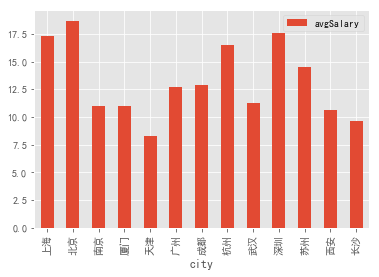

In [35]:
df_clean.groupby('city').mean().plot.bar()

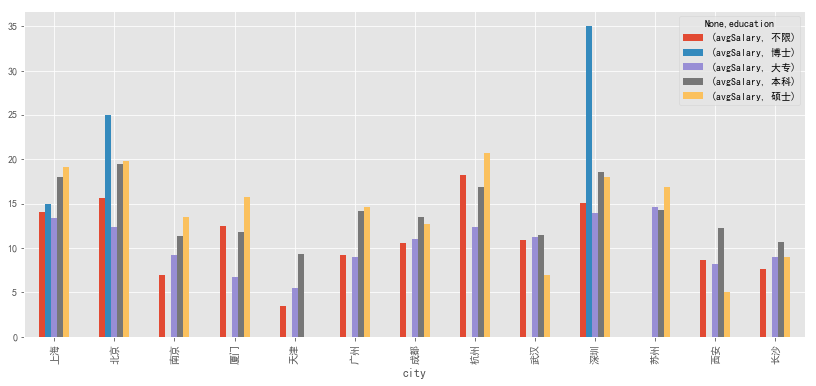

In [36]:
df_clean.groupby(['city','education']).mean().unstack().plot.bar(figsize=(14,6))

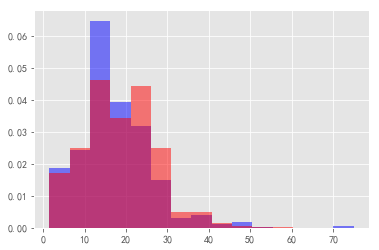

In [37]:
plt.hist(x = df_clean[df_clean.city =='上海'].avgSalary,
        bins = 15,
        normed =1,#转化为密度
        facecolor = 'blue',
        alpha =0.5 #透明度
        )
plt.hist(x = df_clean[df_clean.city =='北京'].avgSalary,
        bins = 15,
        normed =1,#转化为密度
        facecolor = 'red',
        alpha =0.5 #透明度
        )         
plt.show()         

In [38]:
bins =[0,3,5,10,15,20,30,100] #数值分组
level = ['0-3','3-5','5-10','10-15','15-20','20-30','30+'] #分组标签
df_clean['level'] = pd.cut(df_clean['avgSalary'],bins = bins,labels =level)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
df_clean[['avgSalary','level']]

,avgSalary,level
0,8.0,5-10
1,12.5,10-15
2,5.0,3-5
3,7.0,5-10
4,2.5,0-3
5,12.5,10-15
6,10.5,10-15
7,6.0,5-10
8,6.0,5-10
9,3.0,0-3


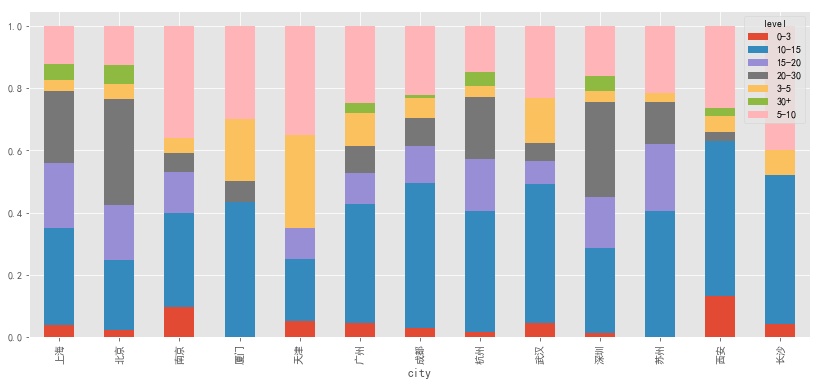

In [40]:
df_level = df_clean.groupby(['city','level']).avgSalary.count().unstack()
df_level_prop = df_level.apply(lambda x:x/x.sum(),axis=1)
df_level_prop.plot.bar(stacked=True,figsize=(14,6)) #stacked 是否堆积

In [41]:
df_clean.positionLables

0                           ['分析师', '数据分析', '数据挖掘', '数据']
1                           ['分析师', '数据分析', '数据挖掘', '数据']
2                                   ['分析师', '数据分析', '数据']
3                              ['商业', '分析师', '大数据', '数据']
4                             ['分析师', '数据分析', '数据', 'BI']
5                       ['实习', '投资', 'FA', '行业研究', '分析师']
6                                                  ['数据']
7                      ['需求分析', '顾问', '咨询', '咨询顾问', '数据']
8                                          ['后端开发', '数据']
9                                                  ['数据']
10                                    ['平台', '大数据', '数据']
11                                         ['数据分析', '数据']
12                                   ['数据分析', '数据', 'BI']
13                                                 ['数据']
14                                          ['大数据', '数据']
15                                                 ['数据']
16                                          ['大数据', '数据']
17            

In [42]:
word = df_clean.positionLables.str[1:-1].str.replace(' ','')

In [43]:
df_word=word.dropna().str.split(',').apply(pd.value_counts)
#dropna() 删除nan值
#pd.value_counts 计算每个标签出现次数

In [49]:
df_word_counts=df_word.unstack().dropna().reset_index().groupby('level_0').count()
#reset_index 重置DataFrame

<function matplotlib.pyplot.show>

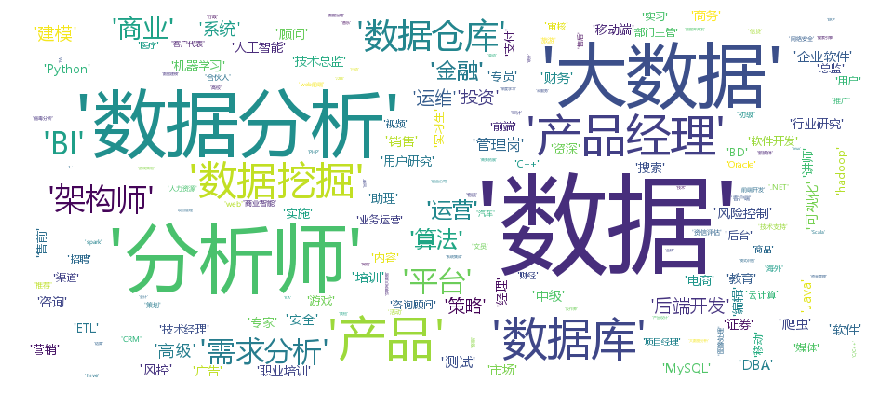

In [52]:
from wordcloud import WordCloud

df_word_count.index = df_word_counts.index.str.replace("'","")

wordcloud = WordCloud(font_path = "C:/Windows/Fonts/msyh.ttc",
                     width=900,height=400,
                     background_color = "white")
f,axs = plt.subplots(figsize=(15,15))
wordcloud.fit_words(df_word_counts.level_1)
axs = plt.imshow(wordcloud)
plt.axis('off')
plt.show

